<a href="https://colab.research.google.com/github/praveerOP/final-project-test1/blob/master/RBL_TSR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

### **Imports**

In [ ]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import h5py
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from PIL import Image

In [ ]:
data = []
labels = []
classes = 2 #Total 43 classes
cur_path = os.getcwd()
print(cur_path)

/content


In [ ]:
#Printing images from drive general code
# img = '/content/drive/MyDrive/KaggleSignsDataset/Train/0/00000_00000_00000.png'
# # print(img)
# from IPython.display import Image # not using this image instead using PIL
# Image('/content/drive/MyDrive/KaggleSignsDataset/Train/3/00003_00000_00000.png')


## Project **code**


### **Importing Dataset from Drive ❌**

In [ ]:
for i in range(classes):
  #path = os.path.join(cur_path,'drive/MyDrive/KaggleSignsDataset', 'Train', str(i), '/')#Not working so changed to the code on the next line
  # print(path)
  path = cur_path+"/drive/MyDrive/KaggleSignsDataset/Train/"+str(i)+'/'
  images = os.listdir(path)
  print(images)
  for a in images:
    try:
    # print("item in images : ",a)
      image = Image.open(path + '/'+ a)
      image = image.resize((30,30))
      image = np.array(image)
      data.append(image)
      labels.append(i)
    except Exception as e:
      print("Error loading image: ", e)
# print(labels)
data = np.array(data)
labels = np.array(labels)
# print(data.shape, labels.shape)

['00000_00004_00001.png', '00000_00001_00024.png', '00000_00003_00010.png', '00000_00004_00014.png', '00000_00001_00017.png', '00000_00006_00004.png', '00000_00005_00029.png', '00000_00002_00001.png', '00000_00001_00006.png', '00000_00005_00008.png', '00000_00006_00016.png', '00000_00006_00020.png', '00000_00003_00006.png', '00000_00000_00016.png', '00000_00005_00007.png', '00000_00005_00015.png', '00000_00000_00012.png', '00000_00001_00011.png', '00000_00002_00020.png', '00000_00005_00017.png', '00000_00002_00006.png', '00000_00001_00001.png', '00000_00004_00008.png', '00000_00004_00003.png', '00000_00004_00025.png', '00000_00004_00015.png', '00000_00005_00001.png', '00000_00005_00022.png', '00000_00004_00024.png', '00000_00001_00029.png', '00000_00004_00026.png', '00000_00001_00018.png', '00000_00003_00004.png', '00000_00001_00013.png', '00000_00005_00006.png', '00000_00003_00013.png', '00000_00004_00027.png', '00000_00001_00026.png', '00000_00003_00011.png', '00000_00000_00025.png',

### **Creating HDF5 dataset of numpy array in drive storage ❌**

In [ ]:
with h5py.File("/content/drive/MyDrive/KaggleSignsDataset/dataset.hdf5", 'w') as f:
    f.create_dataset('data', data=data)
    f.create_dataset('labels', data=labels)

## **Using Dataset as hf5 file**


In [ ]:
hf = h5py.File('/content/drive/MyDrive/KaggleSignsDataset/dataset.hdf5', 'r')
data = np.array(hf['data'])
labels = np.array(hf['labels'])

In [ ]:
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)

(31382, 30, 30, 3) (7846, 30, 30, 3) (31382,) (7846,)


In [ ]:
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

### Model **Building** ❌


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_t1.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# model_path = "/content/drive/MyDrive/KaggleSignsDataset/"
# model = tf.saved_model.load(model_path)

In [ ]:
model_path = "/content/drive/MyDrive/KaggleSignsDataset/Mymodel"
model = tf.keras.models.load_model(model_path)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 64)          36928     
                                                      

## Model Training and **Validation**❌



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
      patience=10,
      mode='min'
)

In [ ]:
eps = 50 # total 10 yet
history = model.fit(X_t1, y_t1, batch_size=32, epochs=eps, validation_data=(X_t2, y_t2), callbacks = [early_stopping])

### **importing Joblib to store the model.fit return**

In [ ]:
import joblib

### **`Saving model and history`** ❌

In [ ]:
history_path = "/content/drive/MyDrive/KaggleSignsDataset/model_history"
joblib.dump(history, history_path)

load history

In [ ]:
history = joblib.load("/content/drive/MyDrive/KaggleSignsDataset/model_history")

### **Plotting** graphs for accuracy of Training data

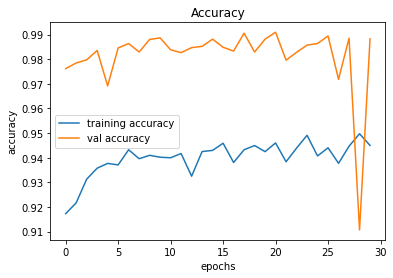

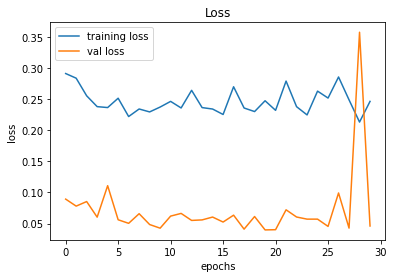

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## **Testing Data**

In [ ]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv(cur_path+"/drive/MyDrive/KaggleSignsDataset/Test.csv")
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
print(len(imgs))
data=[]
path = cur_path+"/drive/MyDrive/KaggleSignsDataset/"
count = 0
for img in imgs:
   count+=1
   print(count, end = ", ")
   if(count % 100 == 0):
    print()
   image = Image.open(path+img)
   image = image.resize((30,30))
   data.append(np.array(image))
X_test=np.array(data)


Creating test dataset once

In [ ]:
with h5py.File("/content/drive/MyDrive/KaggleSignsDataset/X_test.hdf5", 'w') as f:
  f.create_dataset('X_test', data=X_test)

### **Importing test dataset with h5py**

In [ ]:
hf2 = h5py.File('/content/drive/MyDrive/KaggleSignsDataset/X_test.hdf5', 'r')
X_test = np.array(hf2['X_test'])

<class 'numpy.ndarray'>
(30, 30, 3)


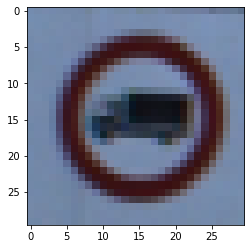

In [ ]:
for i in X_test:
  print(type(i))
  print(i.shape)
  img = Image.fromarray(i, 'RGB')
  img.save('my.png')
  plt.imshow(img)
  break

In [ ]:
predict_X = model.predict(X_test)
pred=np.argmax(predict_X,axis=1)

In [ ]:
# print(history)
print(pred)
# print(model.keys)

[16  1 38 ...  5  7 10]


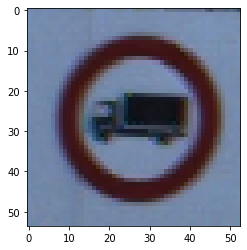

In [ ]:
im = Image.open("/content/drive/MyDrive/KaggleSignsDataset/Test/00000.png")
plt.imshow(im)

In [ ]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
y_test = pd.read_csv(cur_path+"/drive/MyDrive/KaggleSignsDataset/Test.csv")
labels = y_test["ClassId"].values
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9515439429928741


In [ ]:
path = "/content/drive/MyDrive/KaggleSignsDataset/"
model.save("traffic_cassiflier.h5", path)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 80_1.jpg to 80_1.jpg


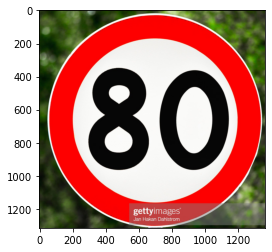

In [ ]:
plt.imshow(plt.imread(list(uploaded.keys())[0]))

In [ ]:
signs =  { 1:'Speed limit (20km/h)',
           2:'Speed limit (30km/h)',
           3:'Speed limit (50km/h)',
           4:'Speed limit (60km/h)',
           5:'Speed limit (70km/h)',
           6:'Speed limit (80km/h)',
           7:'End of speed limit (80km/h)',
           8:'Speed limit (100km/h)',
           9:'Speed limit (120km/h)',
           10:'No passing',
           11:'No passing veh over 3.5 tons',
           12:'Right-of-way at intersection',
           13:'Priority road',
           14:'Yield',
           15:'Stop',
           16:'No vehicles',
           17:'Veh > 3.5 tons prohibited',
           18:'No entry',
           19:'General caution',
           20:'Dangerous curve left',
           21:'Dangerous curve right',
           22:'Double curve',
           23:'Bumpy road',
           24:'Slippery road',
           25:'Road narrows on the right',
           26:'Road work',
           27:'Traffic signals',
           28:'Pedestrians',
           29:'Children crossing',
           30:'Bicycles crossing',
           31:'Beware of ice/snow',
           32:'Wild animals crossing',
           33:'End speed + passing limits',
           34:'Turn right ahead',
           35:'Turn left ahead',
           36:'Ahead only',
           37:'Go straight or right',
           38:'Go straight or left',
           39:'Keep right',
           40:'Keep left',
           41:'Roundabout mandatory',
           42:'End of no passing',
           43:'End no passing vehicle with a weight greater than 3.5 tons' }

In [ ]:
image1 = Image.open(list(uploaded.keys())[0])
image1 = image1.resize((30,30))
image1 = np.array(image1)
plt.imshow(image1)

### **Testing with an input image**

In [ ]:
# print(np.array([test1.shape]))
predict_test1 = model.predict(np.array([image1]))
pred1=np.argmax(predict_test1,axis=1)

In [ ]:
# print(classes)
print(signs[pred1[0]+1])

Speed limit (80km/h)


In [ ]:
print(predict_test1)

[[2.1710111e-33 9.7279491e-09 3.6260127e-12 3.8785322e-13 7.9692953e-19
  9.9999845e-01 1.6003963e-06 8.8589592e-15 2.2246603e-16 0.0000000e+00
  2.4495275e-23 0.0000000e+00 3.4291310e-28 4.0773897e-26 5.9978687e-28
  0.0000000e+00 0.0000000e+00 0.0000000e+00 2.9922558e-34 0.0000000e+00
  1.0412289e-34 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.2352265e-34 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.4188122e-37 0.0000000e+00 0.0000000e+00
  2.2459108e-37 0.0000000e+00 0.0000000e+00 1.5555333e-19 0.0000000e+00
  2.7242273e-29 0.0000000e+00 1.5683608e-20]]


In [ ]:
list_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
x = predict_test1
for i in range(43):
  for j in range(43):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
print(list_index)

[5, 6, 1, 2, 3, 7, 8, 4, 38, 42, 10, 13, 14, 12, 40, 0, 18, 25, 20, 32, 35, 21, 22, 23, 24, 15, 26, 27, 28, 29, 30, 31, 16, 33, 34, 17, 36, 37, 11, 39, 19, 41, 9]


In [ ]:
sorted_result = sorted(predict_test1)
print(predict_test1[0][5]*100)

99.99984502792358


In [ ]:
krut = {}
for i in range(43):
  krut[i] = predict_test1[0][i]
krut1 = sorted(krut.items(), key=lambda item: item[1], reverse=True)
krut1

[(14, 1.0),
 (17, 5.9748144e-09),
 (38, 1.565758e-11),
 (13, 1.0819856e-12),
 (12, 2.2786054e-13),
 (2, 1.6802087e-13),
 (1, 5.052066e-14),
 (5, 1.1595253e-14),
 (8, 1.0397329e-14),
 (25, 6.603803e-15),
 (3, 3.2641706e-16),
 (7, 2.1531112e-16),
 (40, 4.7280618e-17),
 (37, 4.5008902e-17),
 (18, 3.8706818e-17),
 (20, 1.6069737e-17),
 (9, 1.24784174e-17),
 (4, 4.937209e-18),
 (28, 4.8899377e-18),
 (29, 3.611189e-18),
 (35, 3.1394784e-18),
 (26, 2.1293238e-18),
 (11, 2.4138237e-19),
 (32, 1.1316774e-19),
 (23, 3.150104e-20),
 (15, 2.644591e-20),
 (34, 2.349332e-20),
 (36, 1.7191818e-20),
 (0, 1.09243255e-20),
 (21, 4.5499946e-21),
 (33, 1.9817943e-21),
 (39, 3.547108e-22),
 (31, 2.5587093e-22),
 (24, 2.1073077e-22),
 (22, 6.151054e-23),
 (16, 2.024236e-23),
 (10, 1.11748e-23),
 (30, 1.7016596e-24),
 (42, 8.045157e-25),
 (41, 5.299906e-25),
 (6, 4.2486912e-27),
 (27, 1.9908648e-28),
 (19, 8.0655135e-29)]